# Esercitazione 2017-04-20


In [43]:
from IPython.core.display import display, HTML
import nbimporter
from mecdb import MEC
import sklearn.cluster as cls
import numpy as np

def show(doc, w=120):
    style = 'width: ' + str(w) + 'px;'
    try:
        url = doc['image']
    except KeyError:
        url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
    display(HTML('<img src="' + url + '" style="' + style + '">'))

    
def show_grid(docs, w=120, row=6):
    style = 'width: ' + str(w) + 'px; display: inline;'
    html_row = []
    for doc in docs:
        try:
            url = doc['image']
        except KeyError:
            url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
        html_row.append('<img src="' + url + '" style="' + style + '">')
        if len(html_row) == row:
            display(HTML("".join(html_row)))
            html_row = []
    display(HTML("".join(html_row)))
    

dataset = 'calzedoniajson_items_0'
mec = MEC(dataset)

In [8]:
M = mec.dataset_matrix(size=len(mec.dictionary))

tags_matrix = M.T

Esercizio: proviamo a fare un'analisi della terminologia (non dei documenti, ma dei tag)

In [41]:
import sklearn.cluster as cls
import numpy as np

experiments = ['K-Means', 'Affinity propagation', 'Mean-shift', 'Spectral clustering', 'Ward hierarchical clustering', 'DBSCAN', 'Birch']
k = 10

classes = [
    cls.KMeans(n_clusters=k),
    cls.AffinityPropagation(),#preference=50),
    cls.MeanShift(bin_seeding=True),
    cls.SpectralClustering(n_clusters=k),
    cls.AgglomerativeClustering(n_clusters=k, linkage='ward'),
    cls.DBSCAN(eps=1.2, min_samples=6),
    cls.Birch(n_clusters=k)
]

def clustering(method, data):
    return classes[experiments.index(method)].fit(data)

In [38]:
result = {}
for method in experiments:
    result[method] = clustering(method, tags_matrix).labels_


In [39]:
sorted_tags = sorted(mec.dictionary.items(), key=lambda x: x[1])
tags_list = map(lambda x: x[0], sorted_tags)

In [ ]:
readable_result = {}
for method, ary in result.items():
    readable_result[method] = {}
    for i in np.unique(ary):
        readable_result[method][i] = []
    for idx, val in enumerate(ary):
        readable_result[method][val].append(tags_list[idx])

In [49]:
for method, results in readable_result.items():
    print method
    for c, tags in results.items():
        print "Cluster", c
        print tags

Spectral clustering
Cluster 0
[u'Christmas', u'Halloween', u'New Year', u'Pilate', u'World Wide Web', u'abstract', u'accessory', u'accident', u'action', u'active', u'actor', u'actress', u'administration', u'adolescent', u'adult', u'aerobics', u'aid', u'alphabet', u'anatomy', u'architecture', u'arrival', u'art', u'arts and crafts', u'athlete', u'attractive', u'back', u'bag', u'balance', u'ballet', u'balloon', u'band', u'banner', u'bar', u'barbell', u'barefoot', u'basket', u'bass', u'beach', u'beads', u'beautiful', u'bed', u'bedroom', u'belt', u'berry', u'bikini', u'bill', u'birthday', u'black and white', u'blond', u'blur', u'body', u'bodybuilding', u'bone', u'book', u'bouquet', u'bow', u'box', u'boy', u'bracelet', u'brassiere', u'brawny', u'breast', u'bridal', u'bride', u'bridge', u'briefcase', u'bright', u'brunette', u'bus', u'business', u'buttocks', u'car', u'card', u'care', u'carefree', u'case', u'casual', u'celebration', u'chain', u'chair', u'chalk', u'chalkboard', u'character', u'c

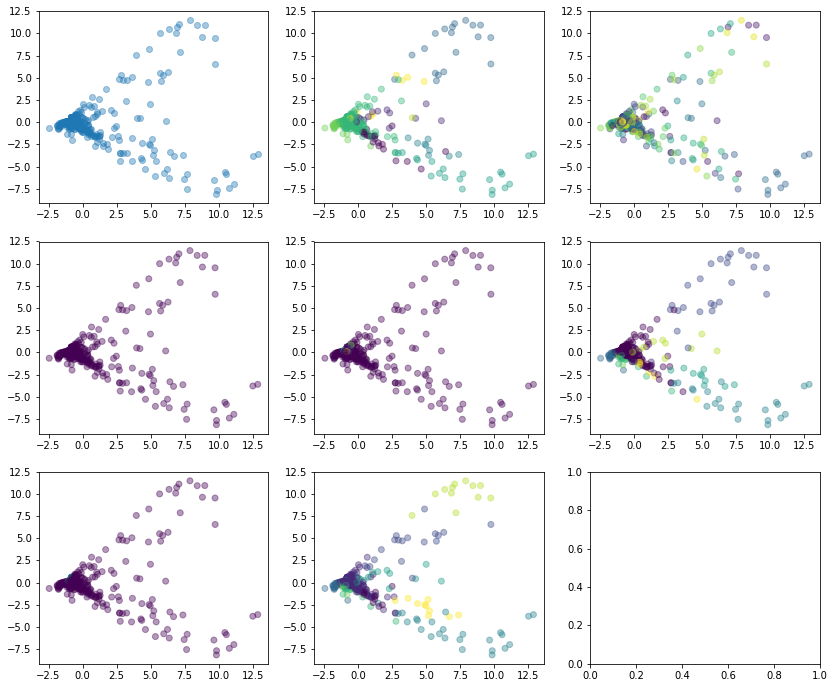

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))
mec.visualize(M.T, axes[0,0])
mec.visualize(M.T, axes[0,1], labels=result['K-Means'])
mec.visualize(M.T, axes[0,2], labels=result['Affinity propagation'])
mec.visualize(M.T, axes[1,0], labels=result['Mean-shift'])
mec.visualize(M.T, axes[1,1], labels=result['Spectral clustering'])
mec.visualize(M.T, axes[1,2], labels=result['Ward hierarchical clustering'])
mec.visualize(M.T, axes[2,0], labels=result['DBSCAN'])
mec.visualize(M.T, axes[2,1], labels=result['Birch'])
plt.show()